<h1 style="text-align: center; color: white; font-size: 2em; padding: 25px; background: linear-gradient(90deg, #FFC0CB, #212F3D);">ParkPatrol - NYC Parking Violations Data Analysis</h1>

This project focuses on analyzing the "Parking Violations Issued Between July 1, 2023 to June 30, 2024" dataset from [NYC Open Data](https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2024/pvqr-7yc4/about_data/) by conducting an Exploratory Data Analysis (EDA) to uncover and visualize patterns and trends.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the drive module from Google Colab to access Google Drive.
from google.colab import drive

# Mount Google Drive to the Colab environment at the specified path.
drive.mount('/content/drive')

# Read the CSV file from the mounted Google Drive into a DataFrame.
df = pd.read_csv('/content/drive/My Drive/Data/03. Parking_Violations_Issued_-_Fiscal_Year_2024_20240917.csv', low_memory=False)
df.head()

Mounted at /content/drive


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1159637337,KZH2758,NY,PAS,06/09/2023,67,VAN,HONDA,P,0,...,BLUE,0.0,2006,-,0,NaN,NaN,NaN,NaN,NaN
1,1252960645,JPD8746,NY,PAS,06/30/2023,87,SUBN,LINCO,M,17870,...,GRAY,0.0,2020,-,0,NaN,NaN,NaN,NaN,NaN
2,1252960669,JPD8746,NY,PAS,06/30/2023,31,SUBN,LINCO,M,17870,...,GRAY,0.0,2020,-,0,NaN,NaN,NaN,NaN,NaN
3,1252994126,MBH9245,99,PAS,07/06/2023,20,SDN,KIA,M,12690,...,WHITE,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN
4,1252994175,MBH9245,PA,PAS,07/08/2023,40,SDN,KIA,M,12690,...,WHITE,0.0,0,-,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# df = pd.read_csv('Data/03. Parking_Violations_Issued_-_Fiscal_Year_2024_20240917.csv')
# df.head()

In [4]:
# As you can see from this output, several columns exhibit null or missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008044 entries, 0 to 19008043
Data columns (total 43 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Summons Number                     int64  
 1   Plate ID                           object 
 2   Registration State                 object 
 3   Plate Type                         object 
 4   Issue Date                         object 
 5   Violation Code                     int64  
 6   Vehicle Body Type                  object 
 7   Vehicle Make                       object 
 8   Issuing Agency                     object 
 9   Street Code1                       int64  
 10  Street Code2                       int64  
 11  Street Code3                       int64  
 12  Vehicle Expiration Date            int64  
 13  Violation Location                 float64
 14  Violation Precinct                 int64  
 15  Issuer Precinct                    int64  
 16  Issuer Code     

In [5]:
# Calculate the count and percentage of null values for each column.
null_count = df.isnull().sum()
null_percentage = df.isnull().mean() * 100

# Create a DataFrame to display both count and percentage.
pd.DataFrame({
    'Null Count': null_count,
    'Null Percentage': null_percentage
})

,Null Count,Null Percentage
Summons Number,0,0.000000
Plate ID,408,0.002146
Registration State,0,0.000000
Plate Type,0,0.000000
Issue Date,0,0.000000
Violation Code,0,0.000000
Vehicle Body Type,48866,0.257081
Vehicle Make,20292,0.106755
Issuing Agency,0,0.000000
Street Code1,0,0.000000


In [6]:
# Considering the high percentage of NaN values in the 'Double Parking Violation', 'Hydrant Violation', 'No Standing or Stopping Violation', 'Unregistered Vehicle?', 'Time First Observed', 'Meter Number', 'To Hours In Effect', 'From Hours In Effect', 'Violation Legal Code', 'Violation Post Code', 'Issuer Squad', 'Intersecting Street', 'House Number', and 'Violation Location' columns, drop these columns.
# Dropping the 'Days Parking In Effect    ', 'Violation In Front Of Or Opposite', and 'Issuer Command' columns as their representations are unclear and have a high percentage of NaN values.
df = df.drop(['Double Parking Violation', 'Hydrant Violation', 'No Standing or Stopping Violation', 'Unregistered Vehicle?', 'Time First Observed', 'Meter Number', 'To Hours In Effect', 'From Hours In Effect', 'Violation Legal Code', 'Violation Post Code', 'Issuer Squad', 'Intersecting Street', 'House Number', 'Violation Location', 'Days Parking In Effect    ', 'Violation In Front Of Or Opposite', 'Issuer Command'], axis=1)

In [7]:
# Considering the low percentage of NaN values in the 'Violation Description', 'Violation County', 'Vehicle Body Type', 'Vehicle Make', 'Sub Division', 'Plate ID', and 'Street Name' columns, drop rows with missing values in these columns.
df = df.dropna(subset=['Violation Description', 'Violation County', 'Vehicle Body Type', 'Vehicle Make', 'Sub Division', 'Plate ID', 'Street Name'])

In [8]:
# Drop rows with missing values in the 'Vehicle Color' column.
df = df.dropna(subset=['Vehicle Color'])

In [9]:
# Convert the 'Issue Date' column to a datetime object for consistency.
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

# Convert the 'Vehicle Expiration Date' column to a datetime object for consistency.
df['Vehicle Expiration Date'] = pd.to_datetime(df['Vehicle Expiration Date'])

In [10]:
# Extract day of the week, day, month, and year information from the 'Issue Date' column and assign them to new columns.
df['Day of Week'] = df['Issue Date'].dt.day_name()
df['Day'] = df['Issue Date'].dt.day
df['Month'] = df['Issue Date'].dt.month
df['Year'] = df['Issue Date'].dt.year

# Extract year and month from the 'Issue Date' column.
df['Year and Month'] = df['Issue Date'].dt.to_period('M')

# Extract week of the month.
df['Week of Month'] = df['Issue Date'].apply(lambda x: (x.day - 1) // 7 + 1)
# df['Week of Month'] = df['Issue Date'].apply(lambda x: min((x.day - 1) // 7 + 1, 4))

# Extract season from 'Month' column.
# Winter (1): December, January, February
# Spring (2): March, April, May
# Summer (3): June, July, August
# Fall (4): September, October, November
df['Season'] = (df['Month'] % 12 // 3 + 1)

# Map season numbers to season names.
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Season'] = df['Season'].map(season_map)

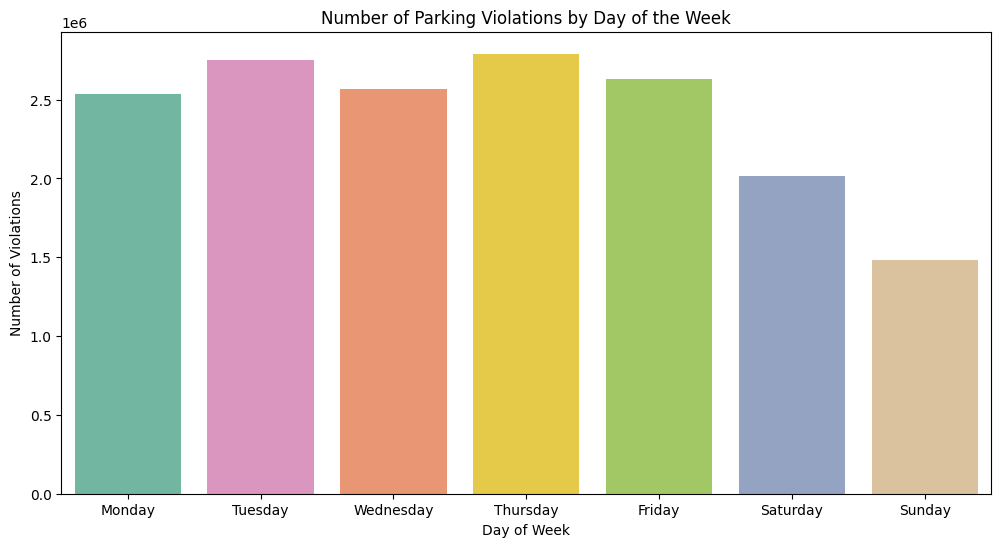

In [11]:
# 01. How do parking violations vary by day of the week?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Day of Week', hue='Day of Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set2', legend=False)
plt.title('Number of Parking Violations by Day of the Week')
plt.ylabel('Number of Violations')
plt.show()

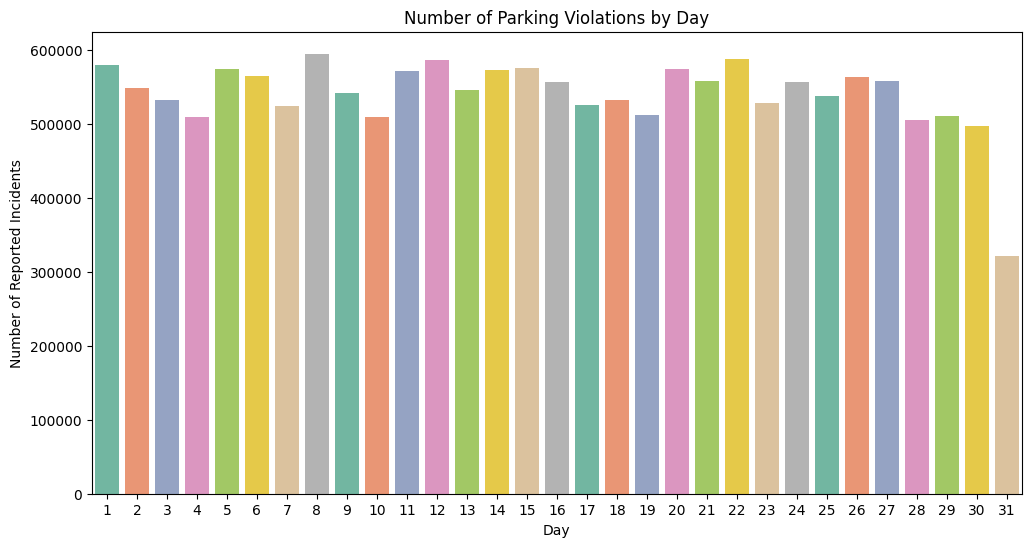

In [12]:
# 02. How do parking violations vary by day?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Day', hue='Day', palette='Set2', legend=False)
plt.title('Number of Parking Violations by Day')
plt.ylabel('Number of Reported Incidents')
plt.show()

In [13]:
# 02. How do parking violations vary by day?
df.groupby('Day').size()

,0
Day,
1,579511
2,549500
3,532885
4,509987
5,574143
6,565289
7,524943
8,595416
9,542240


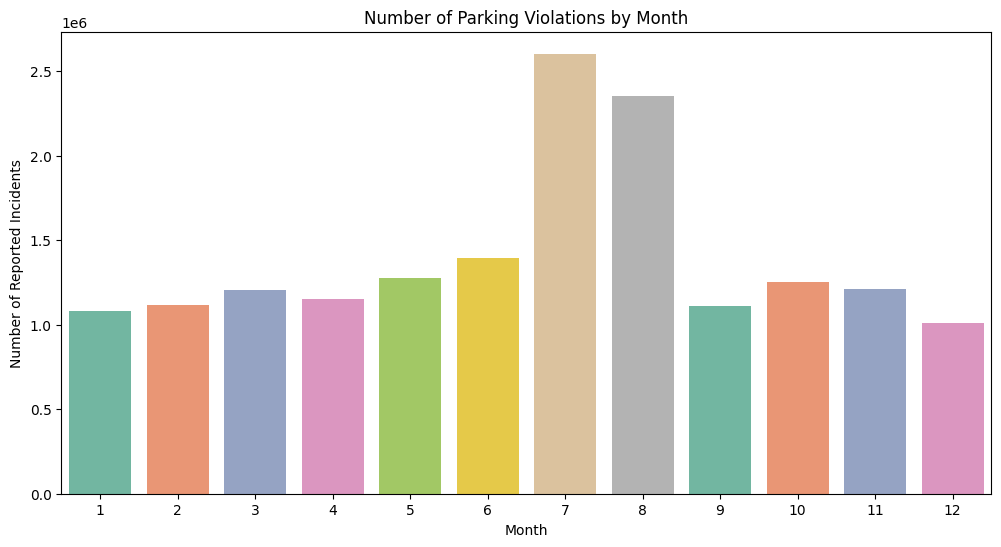

In [14]:
# 03. How do parking violations vary by month?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Month', hue='Month', palette='Set2', legend=False)
plt.title('Number of Parking Violations by Month')
plt.ylabel('Number of Reported Incidents')
plt.show()

In [15]:
# 03. How do parking violations vary by month?
df.groupby('Month').size()

,0
Month,
1,1079234
2,1118972
3,1204001
4,1154561
5,1276309
6,1393241
7,2603375
8,2353458
9,1110910


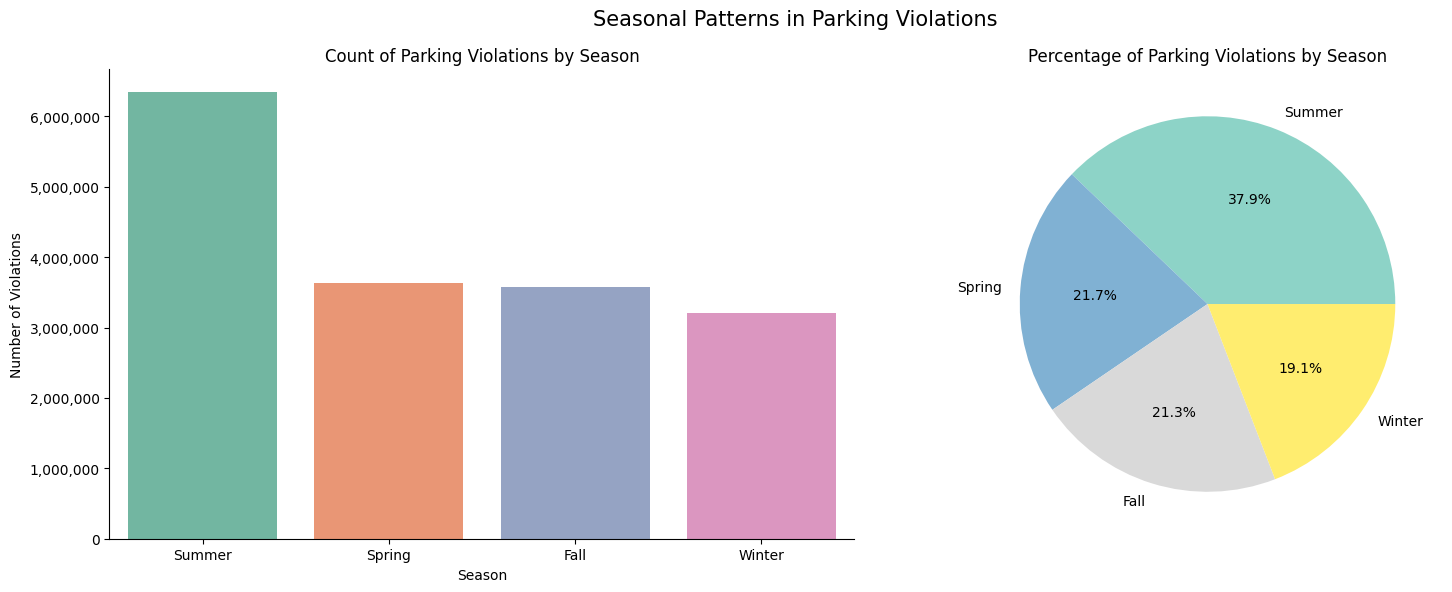

In [16]:
# 04. Are there any seasonal patterns in parking violations (e.g., more violations in winter vs. summer)?
fig, axs = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

# Plot 1: Count Plot
sns.countplot(data=df, x='Season', hue='Season', order=df['Season'].value_counts().index, palette='Set2', legend=False, ax=axs[0])
axs[0].set_title('Count of Parking Violations by Season')
axs[0].set(ylabel='Number of Violations')
axs[0].yaxis.set_major_formatter('{:,.0f}'.format)

# Plot 2: Pie Chart
df['Season'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colormap='Set3')
axs[1].set_title('Percentage of Parking Violations by Season')
axs[1].set(ylabel='')

plt.suptitle('Seasonal Patterns in Parking Violations', fontsize=15)
sns.despine()
plt.tight_layout()
plt.show()

In [17]:
# 04. Are there any seasonal patterns in parking violations (e.g., more violations in winter vs. summer)?
season_counts = df['Season'].value_counts().reset_index(name='Number of Violations')
season_counts['Percentage of Violations'] = (season_counts['Number of Violations'] / season_counts['Number of Violations'].sum()) * 100
season_counts

,Season,Number of Violations,Percentage of Violations
0,Summer,6350074,37.855614
1,Spring,3634871,21.669082
2,Fall,3578959,21.335765
3,Winter,3210554,19.139539


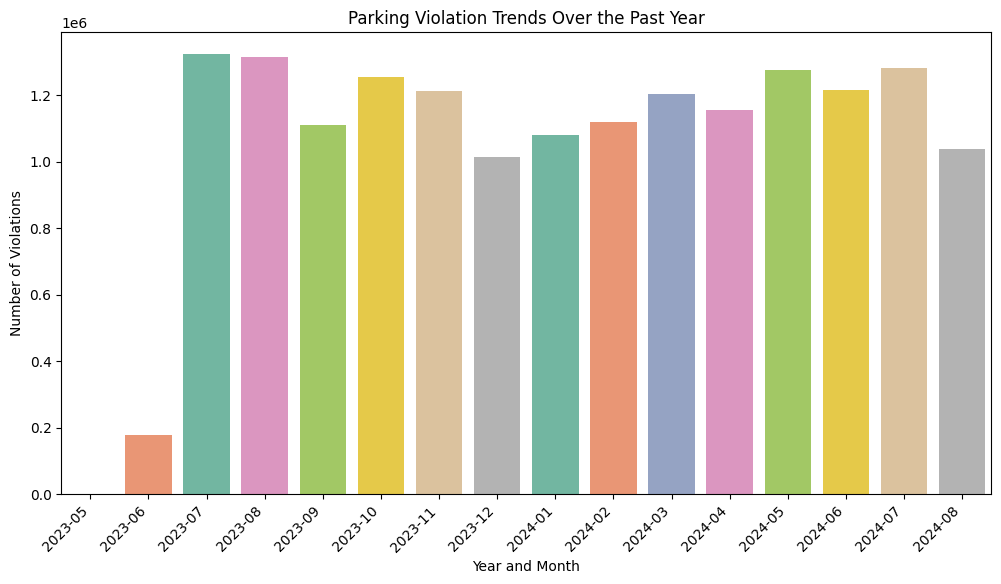

In [18]:
# 05. How have parking violation trends changed over the past year?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Year and Month', hue='Year and Month', order=df['Year and Month'].value_counts().sort_index().index, palette='Set2', legend=False)
plt.title('Parking Violation Trends Over the Past Year')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45, ha='right')
plt.show()

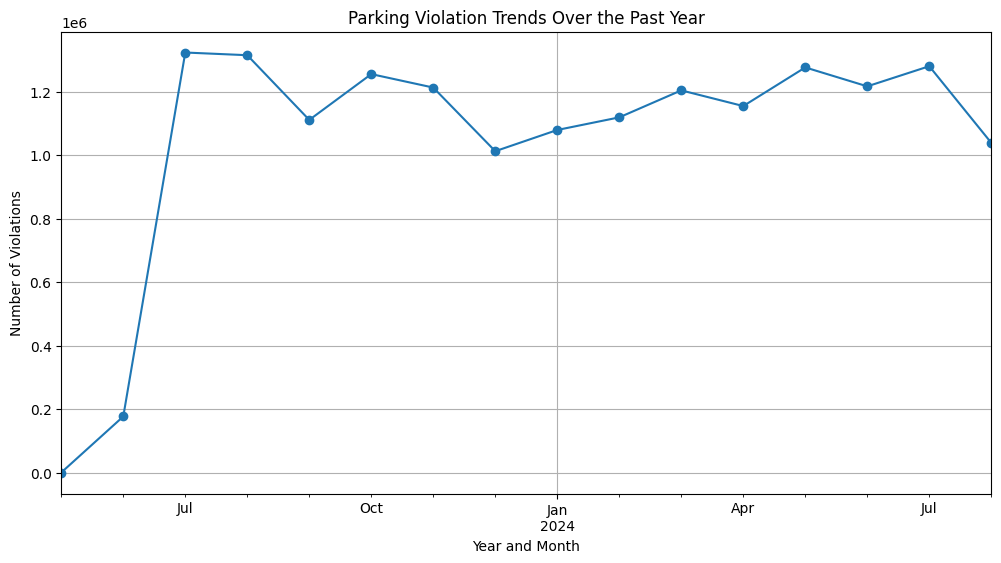

In [19]:
# 05. How have parking violation trends changed over the past year?
# Count the number of parking violation per month.
monthly_violations = df['Year and Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6), dpi=100)
monthly_violations.plot(marker='o')
plt.title('Parking Violation Trends Over the Past Year')
plt.ylabel('Number of Violations')
plt.grid(True)
plt.show()

In [20]:
# 05. How have parking violation trends changed over the past year?
df['Year and Month'].value_counts().sort_index().reset_index(name='Number of Violations')

,Year and Month,Number of Violations
0,2023-05,1
1,2023-06,176568
2,2023-07,1323243
3,2023-08,1314787
4,2023-09,1110910
5,2023-10,1255241
6,2023-11,1212808
7,2023-12,1012348
8,2024-01,1079234
9,2024-02,1118972


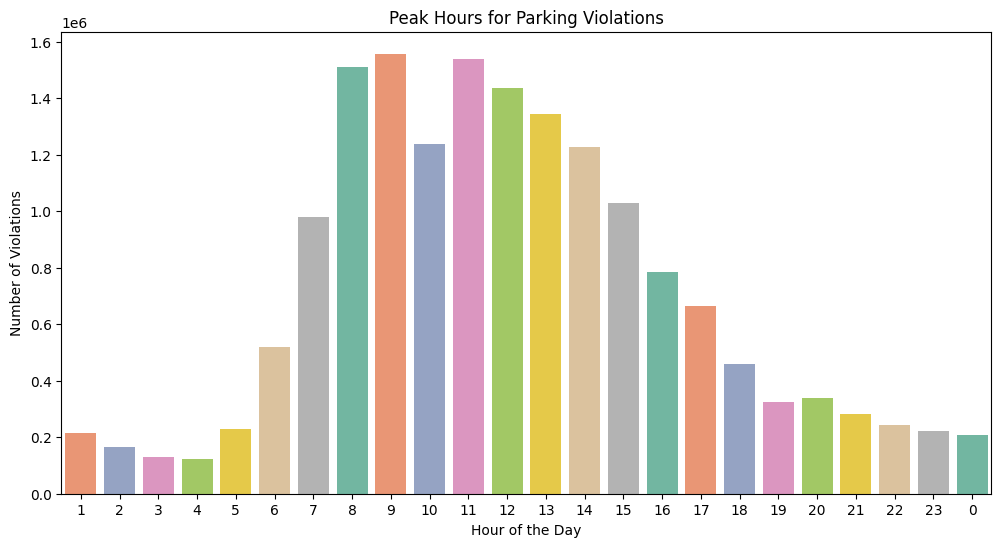

In [21]:
# 06. What are the peak hours for parking violations?
# Function to convert time to 24-hour format.
def convert_to_24_hour(time_str):
    # 'A' or 'P'.
    period = time_str[-1]
    # Extract hour part.
    hour = int(time_str[:2]) % 12
    # Extract minute part.
    minute = int(time_str[2:4])

    if period == 'P':
        # Convert PM to 24-hour format.
        hour += 12

    return f'{hour:02d}:{minute:02d}'

# Apply the function to the Violation Time column.
df['Violation Time 24H'] = np.vectorize(convert_to_24_hour)(df['Violation Time'])

# Convert to datetime and extract the hour.
df['Violation Hour'] = pd.to_datetime(df['Violation Time 24H'], format='%H:%M').dt.hour

plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Violation Hour', hue='Violation Hour', order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0], palette='Set2', legend=False)
plt.title('Peak Hours for Parking Violations')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Violations')
plt.show()

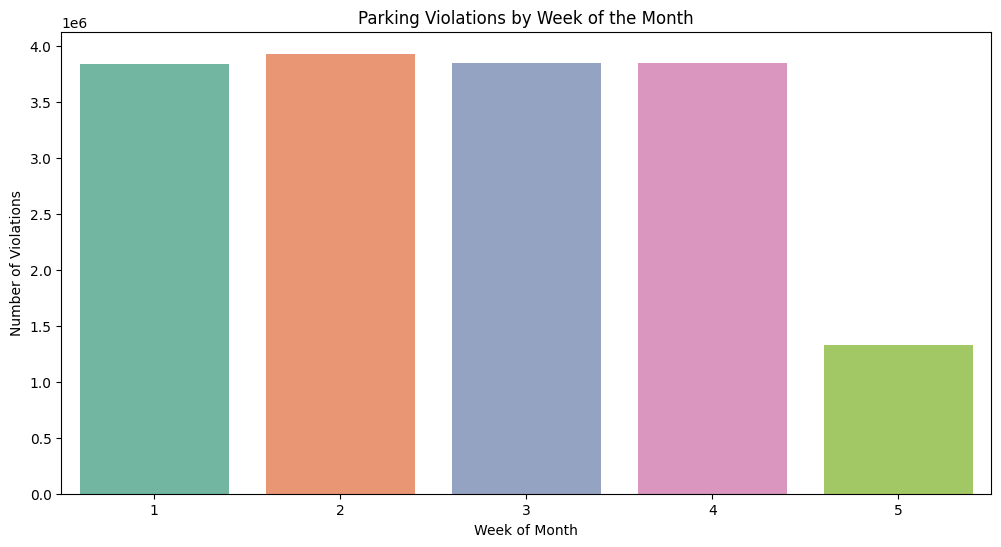

In [22]:
# 07. Do violations increase at the beginning or end of the month?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Week of Month', hue='Week of Month', palette='Set2', legend=False)
plt.title('Parking Violations by Week of the Month')
plt.ylabel('Number of Violations')
plt.show()

In [23]:
# 07. Do violations increase at the beginning or end of the month?
df['Week of Month'].value_counts().sort_index().reset_index(name='Number of Violations')

,Week of Month,Number of Violations
0,1,3836258
1,2,3927090
2,3,3839866
3,4,3840797
4,5,1330447


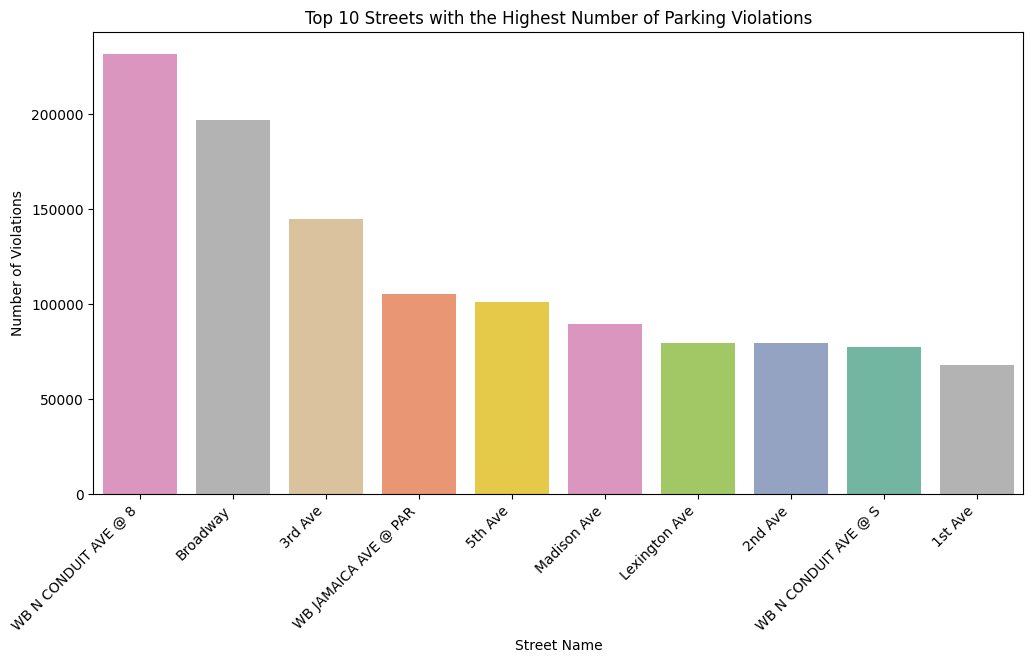

In [24]:
# 08. What are the top 10 streets with the highest number of parking violations?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Street Name', hue='Street Name', order=df['Street Name'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Streets with the Highest Number of Parking Violations')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
# 08. What are the top 10 streets with the highest number of parking violations?
df['Street Name'].value_counts().head(10).reset_index(name='Number of Violations')

,Street Name,Number of Violations
0,WB N CONDUIT AVE @ 8,231722
1,Broadway,196729
2,3rd Ave,144699
3,WB JAMAICA AVE @ PAR,105062
4,5th Ave,100998
5,Madison Ave,89505
6,Lexington Ave,79646
7,2nd Ave,79487
8,WB N CONDUIT AVE @ S,77614
9,1st Ave,67770


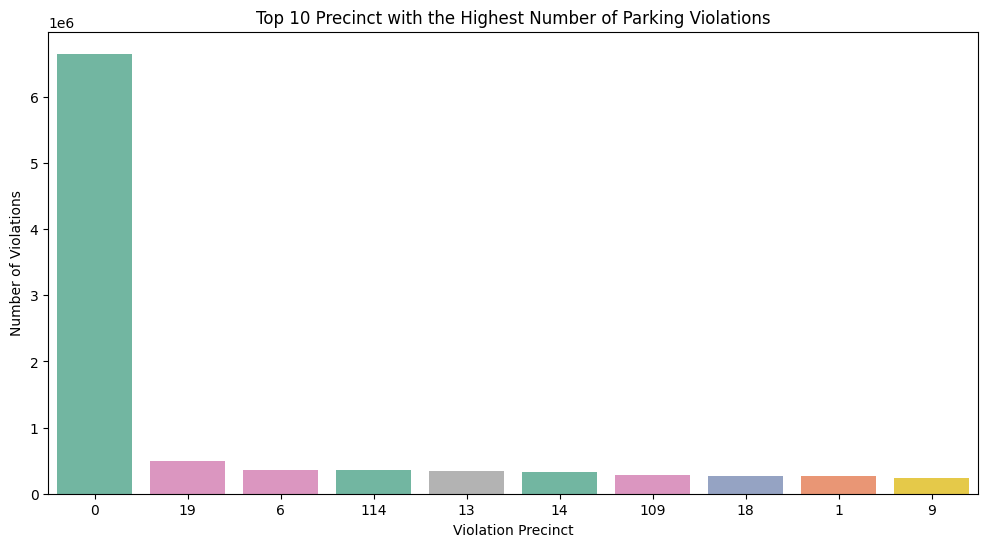

In [26]:
# 09. What are the top 10 precincts that issue the most violations?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Violation Precinct', hue='Violation Precinct', order=df['Violation Precinct'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Precinct with the Highest Number of Parking Violations')
plt.ylabel('Number of Violations')
plt.show()

In [27]:
# 09. What are the top 10 precincts that issue the most violations?
df['Violation Precinct'].value_counts().head(10).reset_index(name='Number of Violations')

,Violation Precinct,Number of Violations
0,0,6650043
1,19,487444
2,6,364177
3,114,360226
4,13,348815
5,14,330670
6,109,277115
7,18,271995
8,1,271692
9,9,241411


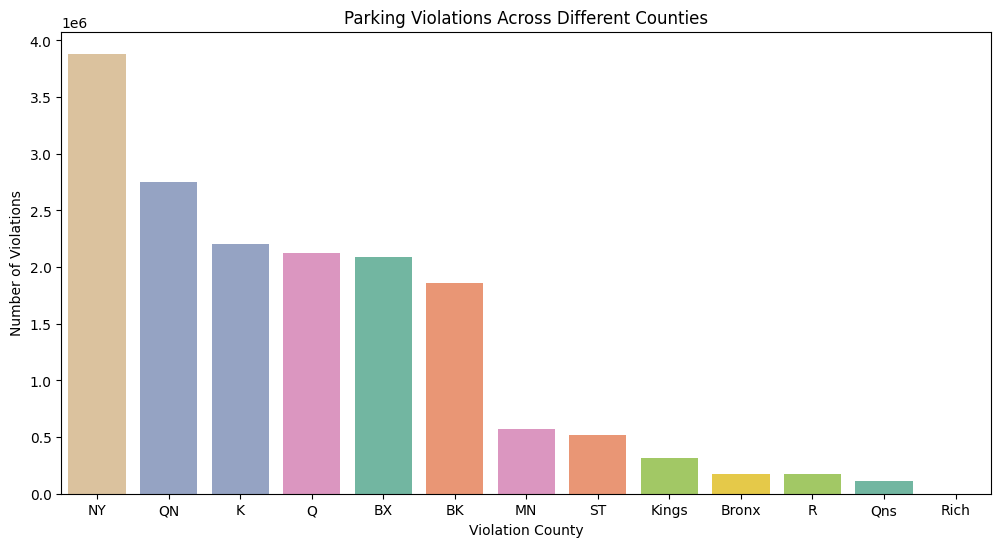

In [28]:
# 10. How do parking violations vary across different counties?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Violation County', hue='Violation County', order=df['Violation County'].value_counts().index, palette='Set2', legend=False)
plt.title('Parking Violations Across Different Counties')
plt.ylabel('Number of Violations')
plt.show()

In [29]:
# 10. How do parking violations vary across different counties?
df['Violation County'].value_counts().reset_index(name='Number of Violations')

,Violation County,Number of Violations
0,NY,3882586
1,QN,2746565
2,K,2201608
3,Q,2123781
4,BX,2089188
5,BK,1861577
6,MN,572517
7,ST,515443
8,Kings,317317
9,Bronx,177577


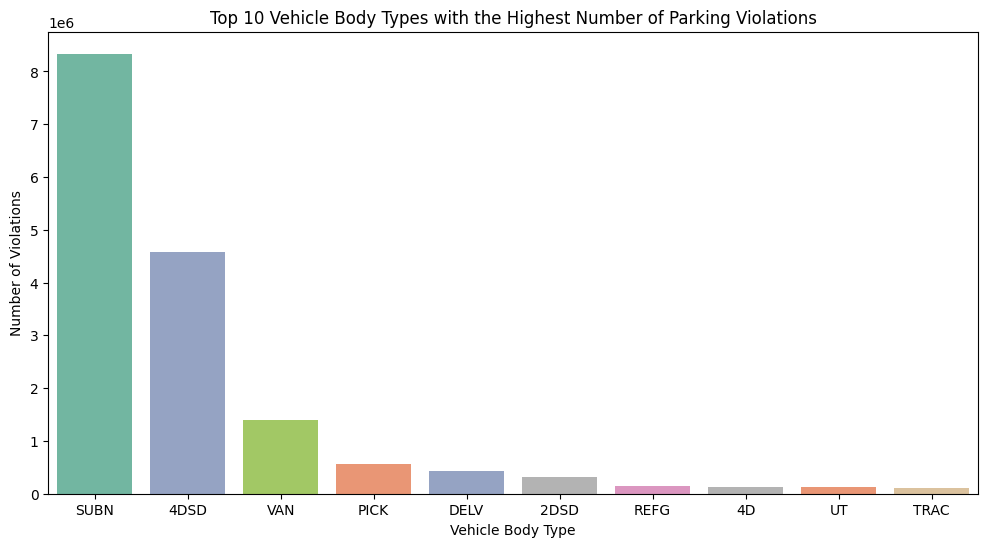

In [30]:
# 11. What are the top 10 vehicle body types that receive the most parking violations?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Vehicle Body Type', hue='Vehicle Body Type', order=df['Vehicle Body Type'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Vehicle Body Types with the Highest Number of Parking Violations')
plt.ylabel('Number of Violations')
plt.show()

In [31]:
# 11. What are the top 10 vehicle body types that receive the most parking violations?
df['Vehicle Body Type'].value_counts().head(10).reset_index(name='Number of Violations')

,Vehicle Body Type,Number of Violations
0,SUBN,8335043
1,4DSD,4587606
2,VAN,1393014
3,PICK,567356
4,DELV,426744
5,2DSD,314370
6,REFG,137399
7,4D,128088
8,UT,118773
9,TRAC,101957


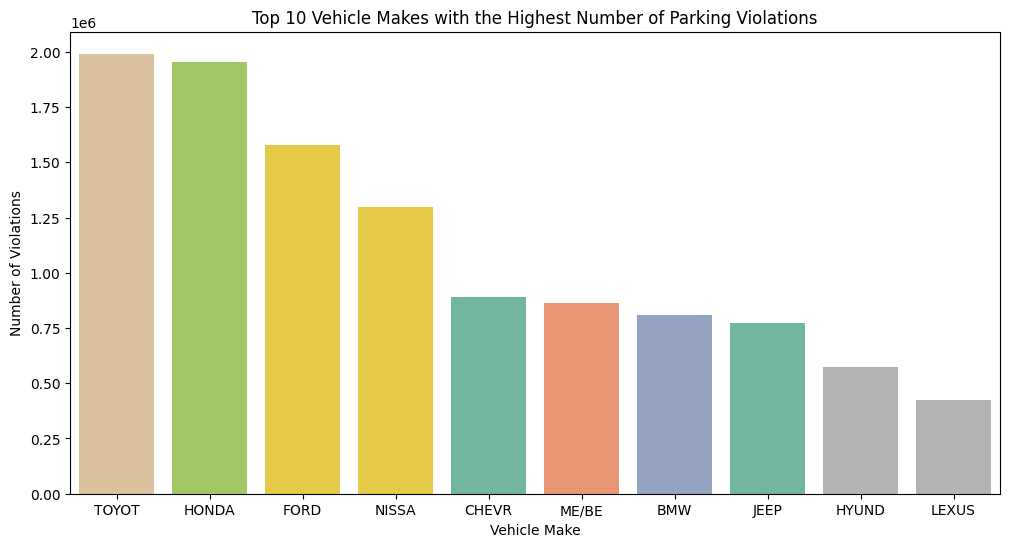

In [32]:
# 12. What are the top 10 vehicle makes that are most frequently ticketed?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Vehicle Make', hue='Vehicle Make', order=df['Vehicle Make'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Vehicle Makes with the Highest Number of Parking Violations')
plt.ylabel('Number of Violations')
plt.show()

In [33]:
# 12. What are the top 10 vehicle makes that are most frequently ticketed?
df['Vehicle Make'].value_counts().head(10).reset_index(name='Number of Violations')

,Vehicle Make,Number of Violations
0,TOYOT,1991517
1,HONDA,1956203
2,FORD,1576616
3,NISSA,1297461
4,CHEVR,889759
5,ME/BE,861327
6,BMW,811136
7,JEEP,772797
8,HYUND,572542
9,LEXUS,422159


In [34]:
# 13. Do older vehicles receive more parking violations?
df['Vehicle Year'].value_counts().sort_index().reset_index(name='Number of Violations')

,Vehicle Year,Number of Violations
0,0,3095892
1,1970,224
2,1971,181
3,1972,306
4,1973,161
...,...,...
89,2065,144
90,2066,170
91,2067,149
92,2068,246


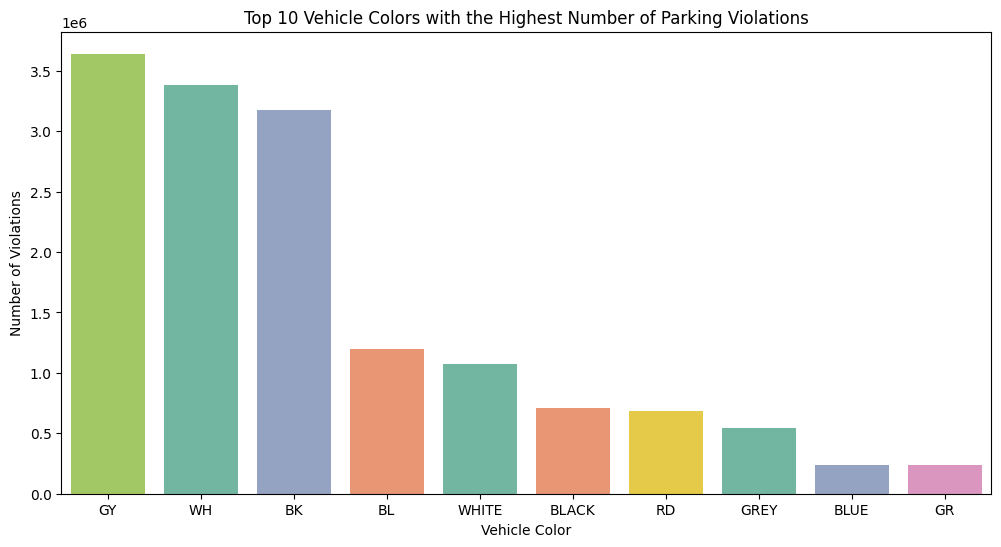

In [35]:
# 14. What are the top 10 vehicle colors with the highest number of parking violations? Are certain vehicle colors more likely to get ticketed?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Vehicle Color', hue='Vehicle Color', order=df['Vehicle Color'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Vehicle Colors with the Highest Number of Parking Violations')
plt.ylabel('Number of Violations')
plt.show()

In [36]:
# 14. What are the top 10 vehicle colors with the highest number of parking violations? Are certain vehicle colors more likely to get ticketed?
df['Vehicle Color'].value_counts().head(10).reset_index(name='Number of Violations')

,Vehicle Color,Number of Violations
0,GY,3640848
1,WH,3385651
2,BK,3176154
3,BL,1194403
4,WHITE,1071598
5,BLACK,708439
6,RD,685503
7,GREY,542855
8,BLUE,237527
9,GR,235978


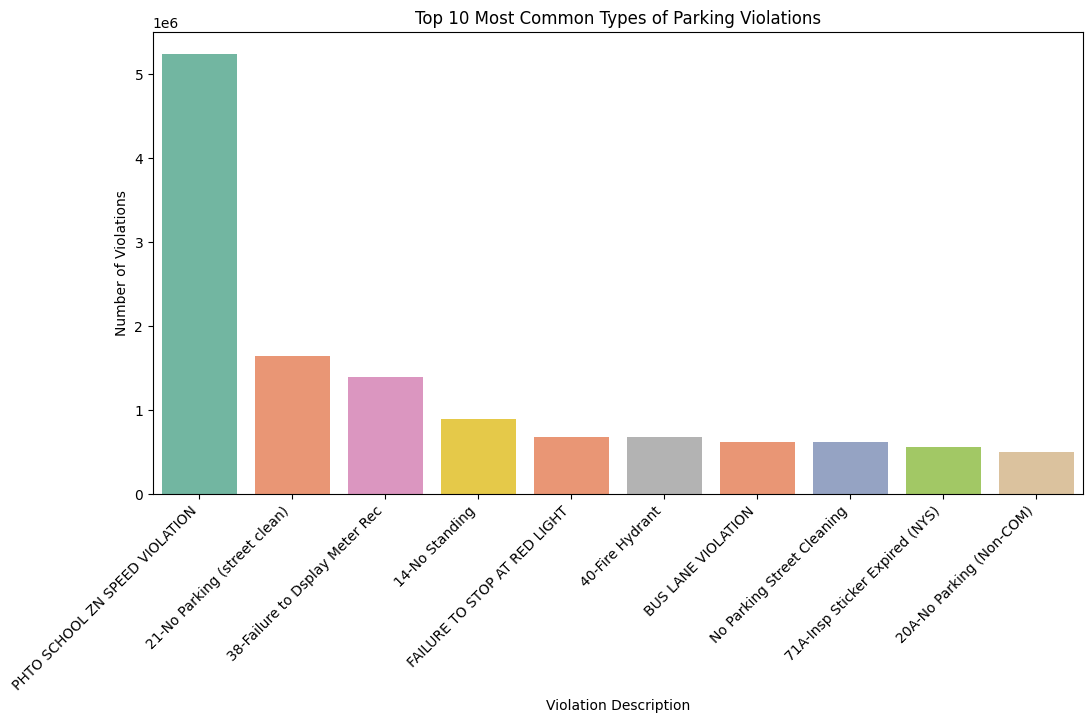

In [37]:
# 15. What are the top 10 most common types of parking violations?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Violation Description', hue='Violation Description', order=df['Violation Description'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Most Common Types of Parking Violations')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45, ha='right')
plt.show()

In [38]:
# 15. What are the top 10 most common types of parking violations?
df['Violation Description'].value_counts().head(10).reset_index(name='Number of Violations')

,Violation Description,Number of Violations
0,PHTO SCHOOL ZN SPEED VIOLATION,5237621
1,21-No Parking (street clean),1644016
2,38-Failure to Dsplay Meter Rec,1390770
3,14-No Standing,891123
4,FAILURE TO STOP AT RED LIGHT,684999
5,40-Fire Hydrant,677777
6,BUS LANE VIOLATION,627289
7,No Parking Street Cleaning,625037
8,71A-Insp Sticker Expired (NYS),568102
9,20A-No Parking (Non-COM),506434


In [39]:
# 16. Which violations are most commonly issued by each agency?
df.groupby('Issuing Agency')['Violation Description'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Violation Description')

,Issuing Agency,Violation Description
0,S,No Parking Street Cleaning
1,T,21-No Parking (street clean)
2,V,PHTO SCHOOL ZN SPEED VIOLATION


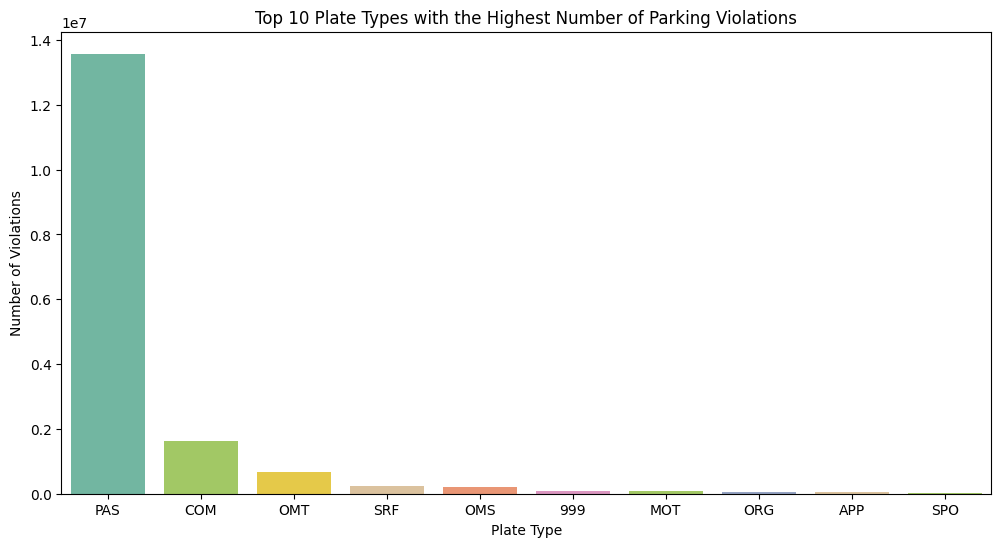

In [40]:
# 17. What are the top 10 plate types with the highest number of parking violations?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Plate Type', hue='Plate Type', order=df['Plate Type'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Plate Types with the Highest Number of Parking Violations')
plt.ylabel('Number of Violations')
plt.show()

In [41]:
# 17. What are the top 10 plate types with the highest number of parking violations?
df['Plate Type'].value_counts().head(10).reset_index(name='Number of Violations')

,Plate Type,Number of Violations
0,PAS,13577917
1,COM,1637849
2,OMT,654959
3,SRF,227309
4,OMS,222441
5,999,77402
6,MOT,68807
7,ORG,49905
8,APP,45916
9,SPO,30684


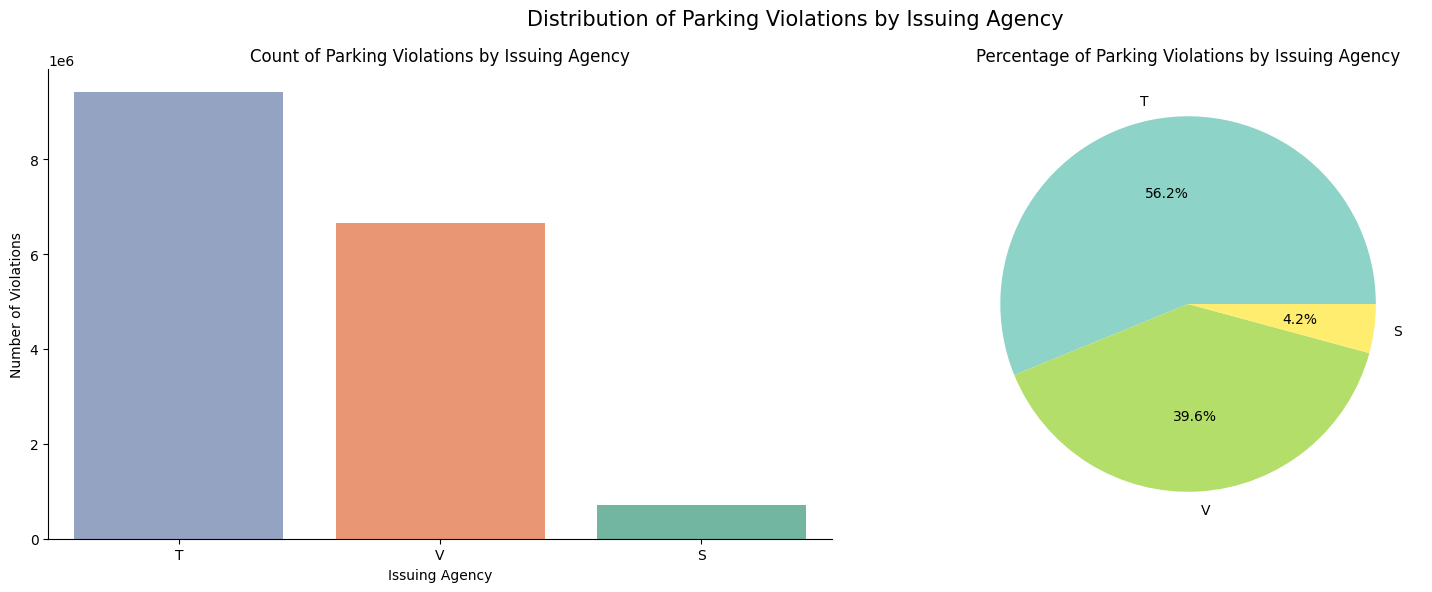

In [42]:
# 18. Which issuing agency handles the most parking violations?
fig, axs = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

# Plot 1: Count Plot
sns.countplot(data=df, x='Issuing Agency', hue='Issuing Agency', order=df['Issuing Agency'].value_counts().index, palette='Set2', legend=False, ax=axs[0])
axs[0].set_title('Count of Parking Violations by Issuing Agency')
axs[0].set(ylabel='Number of Violations')

# Plot 2: Pie Chart
df['Issuing Agency'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colormap='Set3')
axs[1].set_title('Percentage of Parking Violations by Issuing Agency')
axs[1].set(ylabel='')

plt.suptitle('Distribution of Parking Violations by Issuing Agency', fontsize=15)
sns.despine()
plt.tight_layout()
plt.show()

In [43]:
# 18. Which issuing agency handles the most parking violations?
df['Issuing Agency'].value_counts().reset_index(name='Number of Violations')

,Issuing Agency,Number of Violations
0,T,9421710
1,V,6646467
2,S,706281


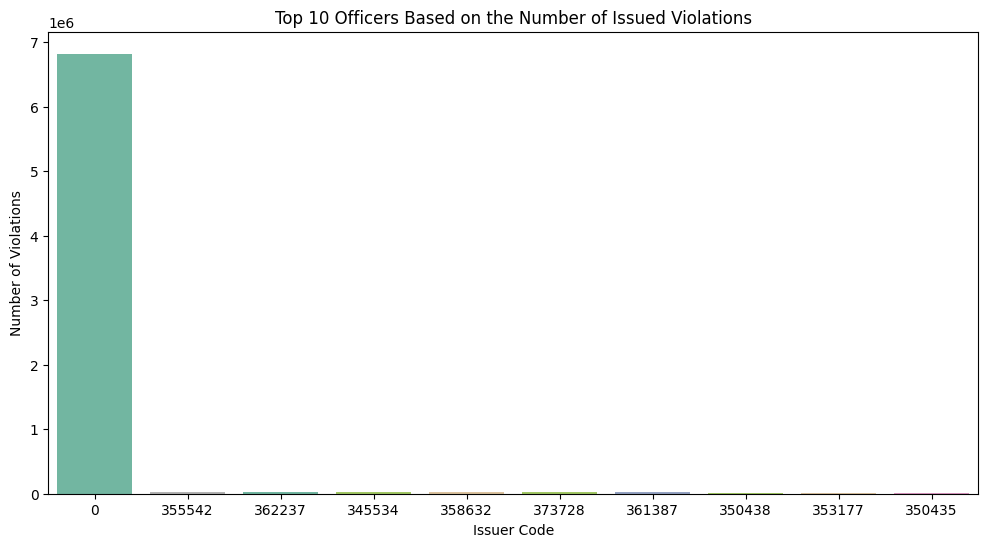

In [44]:
# 19. What are the top 10 officers based on the number of issued violations?
plt.figure(figsize=(12, 6), dpi=100)
sns.countplot(data=df, x='Issuer Code', hue='Issuer Code', order=df['Issuer Code'].value_counts().nlargest(10).index, palette='Set2', legend=False)
plt.title('Top 10 Officers Based on the Number of Issued Violations')
plt.ylabel('Number of Violations')
plt.show()

In [45]:
# 19. What are the top 10 officers based on the number of issued violations?
df['Issuer Code'].value_counts().head(10).reset_index(name='Number of Violations')

,Issuer Code,Number of Violations
0,0,6822924
1,355542,27963
2,362237,27434
3,345534,25568
4,358632,21375
5,373728,19528
6,361387,18973
7,350438,18388
8,353177,18287
9,350435,18268


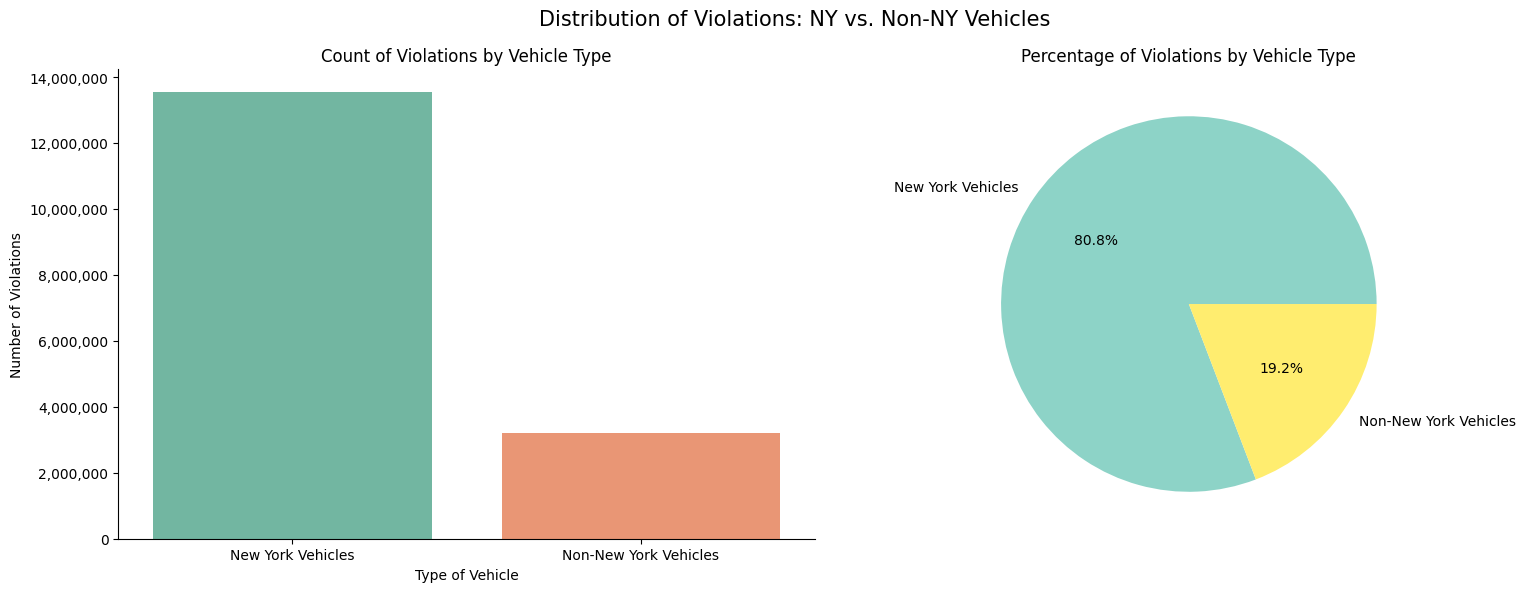

In [46]:
# 20. How do in-state (NY) vs. out-of-state vehicles compare in terms of violations?
# Create a DataFrame to compare the number of violations between NY and non-NY vehicles
violations_comparison_df = pd.DataFrame({
    'Type of Vehicle': ['New York Vehicles', 'Non-New York Vehicles'],
    'Number of Violations': [df[df['Registration State'] == 'NY'].shape[0], df[df['Registration State'] != 'NY'].shape[0]]
})

fig, axs = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

# Plot 1: Bar Plot
sns.barplot(data=violations_comparison_df, x='Type of Vehicle', y='Number of Violations', hue='Type of Vehicle', palette='Set2', legend=False, ax=axs[0])
axs[0].set_title('Count of Violations by Vehicle Type')
axs[0].set(ylabel='Number of Violations')
axs[0].yaxis.set_major_formatter('{:,.0f}'.format)

# Plot 2: Pie Chart
violations_comparison_df.set_index('Type of Vehicle')['Number of Violations'].plot.pie(autopct='%1.1f%%', ax=axs[1], colormap='Set3')
axs[1].set_title('Percentage of Violations by Vehicle Type')
axs[1].set(ylabel='')

plt.suptitle('Distribution of Violations: NY vs. Non-NY Vehicles', fontsize=15)
sns.despine()
plt.tight_layout()
plt.show()

In [47]:
# 20. How do in-state (NY) vs. out-of-state vehicles compare in terms of violations?
pd.DataFrame({
    'Type of Vehicle': ['New York Vehicles', 'Non-New York Vehicles'],
    'Number of Violations': [df[df['Registration State'] == 'NY'].shape[0], df[df['Registration State'] != 'NY'].shape[0]]
})

,Type of Vehicle,Number of Violations
0,New York Vehicles,13555290
1,Non-New York Vehicles,3219168


In [48]:
# 21. What are the top 10 most common combinations of violation code and vehicle make?
df.groupby(['Violation Code', 'Vehicle Make']).size().nlargest(10).reset_index(name='Number of Violations')

,Violation Code,Vehicle Make,Number of Violations
0,36,TOYOT,646389
1,36,HONDA,632345
2,36,NISSA,461672
3,36,FORD,343733
4,21,HONDA,321060
5,21,TOYOT,305963
6,36,ME/BE,299814
7,36,BMW,298253
8,36,JEEP,295999
9,36,CHEVR,263986


In [49]:
# 22. Which days of the week are most problematic for specific types of violations?
# Get the top 3 most common violation codes.
top_violation_codes = df['Violation Code'].value_counts().head(3).index.tolist()

# Initialize an empty list to store DataFrames for each violation code.
results = []

# Loop through each top violation code.
for code in top_violation_codes:
    # Filter the DataFrame for the current violation code and count occurrences of each day of the week.
    day_counts = df[df['Violation Code'] == code]['Day of Week'].value_counts().reset_index()
    day_counts.columns = ['Day of Week', f'Number of Violations for Code {code}']
    results.append(day_counts)

# Concatenate all results into a single DataFrame.
pd.concat(results, axis=1)

,Day of Week,Number of Violations for Code 36,Day of Week,Number of Violations for Code 21,Day of Week,Number of Violations for Code 38
0,Sunday,955642,Tuesday,515275,Wednesday,272275
1,Saturday,871364,Thursday,514388,Thursday,241315
2,Monday,709190,Friday,495307,Tuesday,239766
3,Friday,703320,Monday,449332,Saturday,228144
4,Thursday,683540,Wednesday,197521,Monday,205595
5,Wednesday,661253,Saturday,97212,Friday,203666
6,Tuesday,653312,Sunday,18,Sunday,9


In [50]:
# 22. Which days of the week are most problematic for specific types of violations?
# Get the top 3 most common violation codes.
top_violation_codes = df['Violation Code'].value_counts().head(3).index.tolist()

# Define the custom order of days of the week.
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Initialize an empty dictionary to store DataFrames for each violation code.
results = {}

# Loop through each top violation code.
for code in top_violation_codes:
    # Filter the DataFrame for the current violation code and count occurrences of each day of the week.
    day_counts = df[df['Violation Code'] == code]['Day of Week'].value_counts().reindex(day_order).reset_index()
    day_counts.columns = ['Day of Week', f'Number of Violations for Code {code}']
    results[f'Number of Violations for Code {code}'] = day_counts.set_index('Day of Week')

# Concatenate all results into a single DataFrame.
pd.concat(results.values(), axis=1)

,Number of Violations for Code 36,Number of Violations for Code 21,Number of Violations for Code 38
Day of Week,,,
Monday,709190,449332,205595
Tuesday,653312,515275,239766
Wednesday,661253,197521,272275
Thursday,683540,514388,241315
Friday,703320,495307,203666
Saturday,871364,97212,228144
Sunday,955642,18,9


In [51]:
# 23. Are there particular times of day when certain vehicle types (e.g., commercial) are more frequently ticketed?
df[df['Plate Type'] == 'COM']['Violation Hour'].value_counts().sort_index()

,count
Violation Hour,
0,6600
1,10902
2,9506
3,5925
4,3530
5,7670
6,22086
7,88439
8,149539


In [52]:
# 24. How many violations has each officer issued over the years, and who has issued the most violations overall?
# Grouping data by officer and year, then calculating violations per year.
violations_by_officer = df.groupby(['Issuer Code', df['Issue Date'].dt.year]).size().unstack(fill_value=0)

# Adding a column for the total number of violations across all years.
violations_by_officer['Total Violations'] = violations_by_officer.sum(axis=1)

# Sorting the data by total violations in descending order.
violations_by_officer.sort_values('Total Violations', ascending=False)

Issue Date,2023,2024,Total Violations
Issuer Code,,,
0,3242371,3580553,6822924
355542,11973,15990,27963
362237,12011,15423,27434
345534,11205,14363,25568
358632,7555,13820,21375
...,...,...,...
601590,1,0,1
661120,1,0,1
686969,0,1,1


In [53]:
# 25. Which locations have the highest number of violations at specific hours of the day?
# Grouping data by location and violation hour, then finding the top 10 combinations with the highest frequency of violations.
df.groupby(['Street Code1', 'Violation Hour']).size().nlargest(10).reset_index(name='Frequency')

,Street Code1,Violation Hour,Frequency
0,0,12,466411
1,0,11,460139
2,0,13,457085
3,0,14,444519
4,0,15,437242
5,0,10,415386
6,0,16,411170
7,0,9,399210
8,0,17,373526
9,0,8,370502


In [54]:
# 26. Are there temporal patterns within a day (e.g., morning vs. afternoon) for different types of violations?
df.groupby(['Violation Code', 'Violation Hour']).size().unstack().fillna(0)

Violation Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Violation Code,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,7.0,17.0,28.0,29.0,...,9.0,8.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,18.0,17.0,...,7.0,14.0,13.0,4.0,2.0,3.0,0.0,1.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,20.0,...,146.0,65.0,30.0,24.0,24.0,0.0,0.0,0.0,0.0,0.0
5,3545.0,2432.0,1797.0,1346.0,1493.0,1725.0,11549.0,30475.0,36234.0,37549.0,...,49196.0,52427.0,57929.0,58588.0,53829.0,29682.0,12455.0,11367.0,5439.0,4816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# 27. Are there specific vehicle makes or body types more likely to have repeat violations?
# Identify vehicles with repeat violations.
repeat_violations = df.groupby('Plate ID').size().reset_index(name='Violation Count')

# Filter for vehicles with more than one violation.
repeat_vehicles = repeat_violations[repeat_violations['Violation Count'] > 1]

# Merge with vehicle details to get Make and Body Type information.
repeat_vehicles.merge(df[['Plate ID', 'Vehicle Make', 'Vehicle Body Type']], on='Plate ID').drop_duplicates().nlargest(10, 'Violation Count')

,Plate ID,Violation Count,Vehicle Make,Vehicle Body Type
2857956,BLANKPLATE,14861,NS,MCY
2858000,BLANKPLATE,14861,HONDA,4DSD
2858015,BLANKPLATE,14861,CHEVR,4DSD
2858016,BLANKPLATE,14861,TOYOT,4DSD
2858018,BLANKPLATE,14861,BMW,MCY
2858027,BLANKPLATE,14861,FORD,VAN
2858029,BLANKPLATE,14861,NS,MOPD
2858050,BLANKPLATE,14861,NS,MOBL
2858056,BLANKPLATE,14861,NS,N/S
2858061,BLANKPLATE,14861,HONDA,MOPD


In [56]:
# 28. Which parking regulations are most commonly violated?
df['Violation Description'].value_counts().nlargest(10).reset_index(name='Number of Occurrences')

,Violation Description,Number of Occurrences
0,PHTO SCHOOL ZN SPEED VIOLATION,5237621
1,21-No Parking (street clean),1644016
2,38-Failure to Dsplay Meter Rec,1390770
3,14-No Standing,891123
4,FAILURE TO STOP AT RED LIGHT,684999
5,40-Fire Hydrant,677777
6,BUS LANE VIOLATION,627289
7,No Parking Street Cleaning,625037
8,71A-Insp Sticker Expired (NYS),568102
9,20A-No Parking (Non-COM),506434


In [57]:
# 28. Which parking regulations are most commonly violated?
df['Violation Code'].value_counts().nlargest(10).reset_index(name='Number of Occurrences')

,Violation Code,Number of Occurrences
0,36,5237621
1,21,2269053
2,38,1390770
3,14,902620
4,20,703275
5,40,690162
6,7,684999
7,71,663832
8,5,627289
9,70,460480


In [58]:
# 29. What are the most common violations descriptions for vehicles from out-of-state?
local_state = 'NY'
out_of_state_violations = df[df['Registration State'] != local_state]
out_of_state_violations['Violation Description'].value_counts().nlargest(10).reset_index(name='Number of Occurrences')

,Violation Description,Number of Occurrences
0,21-No Parking (street clean),484879
1,38-Failure to Dsplay Meter Rec,400774
2,PHTO SCHOOL ZN SPEED VIOLATION,373806
3,14-No Standing,290196
4,40-Fire Hydrant,247779
5,No Parking Street Cleaning,225813
6,20A-No Parking (Non-COM),171434
7,31-No Stand (Com. Mtr. Zone),128132
8,19-No Stand (bus stop),90106
9,16A-No Std (Com Veh) Non-COM,70303


In [59]:
# 29. What are the most common violation codes for vehicles from out-of-state?
local_state = 'NY'
out_of_state_violations = df[df['Registration State'] != local_state]
out_of_state_violations['Violation Code'].value_counts().nlargest(10).reset_index(name='Number of Occurrences')

,Violation Code,Number of Occurrences
0,21,710692
1,38,400774
2,36,373806
3,14,296443
4,40,252873
5,20,208971
6,31,128132
7,19,90461
8,46,88300
9,16,74655


In [60]:
# 30. How do parking violation trends vary on holidays or weekends compared to regular weekdays?
# Define the holiday dates as datetime objects.
# NYC Fiscal Year holidays in datetime format.
holiday_dates = pd.to_datetime([
    '2023-07-04',  # Independence Day
    '2023-09-04',  # Labor Day
    '2023-10-09',  # Columbus Day/Indigenous Peoples' Day
    '2023-11-07',  # Election Day
    '2023-11-10',  # Veterans Day (Observed)
    '2023-11-23',  # Thanksgiving Day
    '2023-12-25',  # Christmas Day
    '2024-01-01',  # New Year's Day
    '2024-01-15',  # Martin Luther King Jr. Day
    '2024-02-19',  # Presidents' Day
    '2024-03-29',  # Good Friday
    '2024-05-27',  # Memorial Day
    '2024-06-19'   # Juneteenth (Observed)
])

# Create boolean columns for weekends and holidays.
df['Is Weekend'] = df['Issue Date'].dt.dayofweek >= 5
df['Is Holiday'] = df['Issue Date'].isin(holiday_dates)

# Group by 'Is Weekend' and 'Is Holiday' and count the number of violations
df.groupby(['Is Weekend', 'Is Holiday']).size().reset_index(name='Violation Count')

,Is Weekend,Is Holiday,Violation Count
0,False,False,12920652
1,False,True,358538
2,True,False,3495268


In [61]:
# 31. Which types of vehicles are most frequently involved in multiple violations at the same location?
# Combine street codes into a single location identifier.
df['Location'] = df[['Street Code1', 'Street Code2', 'Street Code3']].astype(str).agg('_'.join, axis=1)

# Group by Plate ID, Location, and Vehicle Body Type, then filter and sort.
repeat_location_violations = (
    df.groupby(['Plate ID', 'Location', 'Vehicle Make', 'Vehicle Body Type'])
    .size()
    .reset_index(name='Violation Count')
    .query('`Violation Count` > 1')
    .sort_values(by='Violation Count', ascending=False)
    .head(10)
)
repeat_location_violations

,Plate ID,Location,Vehicle Make,Vehicle Body Type,Violation Count
7297606,LCM8254,0_0_0,AUDI,4DSD,489
7946660,LHR1977,0_0_0,ME/BE,4DSD,445
930422,64690MD,34550_0_0,FRUEH,VAN,384
2303761,EJ45765,0_0_0,BMW,4DOO,364
1252718,86117MM,34550_10410_10510,FORD,VAN,358
5984590,KUH7331,0_0_0,ME/BE,4DSD,352
744043,51589JW,34270_10510_10610,FRUEH,VAN,341
779400,54239MN,33970_10710_33910,HIN,REFG,339
1422817,96091MA,18710_24890_10210,FRUEH,VAN,337
352365,29133ML,35110_13610_11710,FRUEH,VAN,324


In [62]:
# 32. How often do violations occur in close proximity to previous violations for the same vehicle?
# Sort by Plate ID and Issue Date.
df_sorted = df.sort_values(by=['Plate ID', 'Issue Date'])

# Calculate the time difference in days between violations for the same vehicle.
df_sorted['Time Diff'] = df_sorted.groupby('Plate ID')['Issue Date'].diff().dt.days

# Determine if the violation is within 30 days of a previous violation.
df_sorted['Proximity Violations'] = (df_sorted['Time Diff'] <= 30).astype(int)

# Sum up the proximity violations for each vehicle.
violation_counts = df_sorted.groupby('Plate ID')['Proximity Violations'].sum().reset_index(name='Violation Count')

# Get the top 10 vehicles with the most proximity violations.
violation_counts.nlargest(10, 'Violation Count')

,Plate ID,Violation Count
580734,BLANKPLATE,14860
225926,54239MN,1011
394326,96091MA,1006
350997,86145MM,955
391572,95408MD,899
225942,54243MN,895
338508,82547PC,880
378559,91665MC,876
362329,89406MJ,871
3437570,PAU1320,864


In [63]:
# 33. What proportion of parking violations are issued by different issuing agencies?
df['Issuing Agency'].value_counts(normalize=True)

,proportion
Issuing Agency,
T,0.561670
V,0.396225
S,0.042105


In [64]:
# 34. What is the distribution of violation counts across different counties?
df['Violation County'].value_counts()

,count
Violation County,
NY,3882586
QN,2746565
K,2201608
Q,2123781
BX,2089188
BK,1861577
MN,572517
ST,515443
Kings,317317


In [65]:
# 35. Are there any trends in the types of violations issued over time (e.g., increase in specific violations)?
df.groupby(['Year and Month', 'Violation Code']).size().unstack().fillna(0).transpose()

Year and Month,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08
Violation Code,,,,,,,,,,,,,,,,
1,0.0,0.0,5.0,23.0,7.0,16.0,13.0,7.0,13.0,2.0,10.0,3.0,0.0,11.0,9.0,8.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,10.0,14.0,7.0,3.0,9.0,9.0,13.0,5.0,11.0,5.0,0.0,10.0,8.0,9.0
4,0.0,0.0,20.0,26.0,35.0,31.0,29.0,40.0,79.0,45.0,67.0,24.0,38.0,67.0,53.0,58.0
5,0.0,19608.0,34028.0,34021.0,32328.0,49722.0,58144.0,56968.0,43604.0,46076.0,51474.0,41946.0,45611.0,43544.0,47040.0,23175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
96,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0
97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


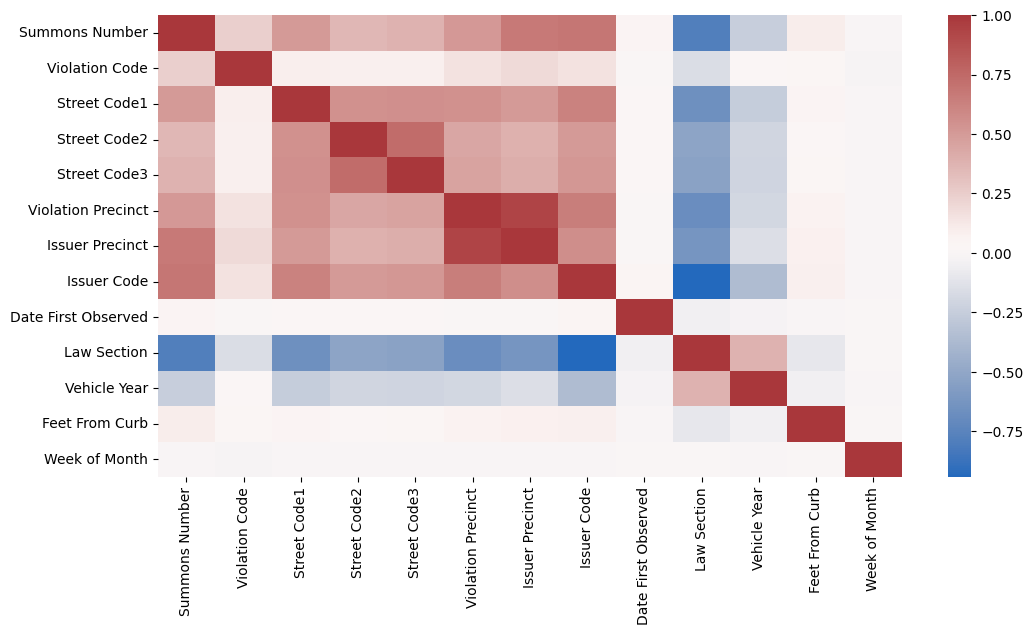

In [66]:
# 36. What are the correlations between the numeric features in the dataset?
# Select only numeric columns from the DataFrame and generate a correlation matrix for those columns.
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 6), dpi=100)
sns.heatmap(corr_matrix, cmap='vlag')
plt.show()